## Import libraries

In [1]:
#from __future__ import print_function

import tensorflow as tf
import keras
from keras.datasets import mnist, fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from functools import partial

## Define initial variables

In [2]:
num_classes = 10
epochs = 30
validation_size = 0.1

## Create functions

### Train test split

In [3]:
def split_train_test_valid(dataset, verbose=False, rand_permute=False):
  (X_train, y_train), (X_test, y_test) = dataset.load_data()
  if rand_permute:
    if verbose:
      print("Creating random permutation")
    # I have checked the permuted and non permuted datasets with the same
    # randomstate and the columns are correctly permuted, i.e. the values
    # from the rows in the columns match
    X = np.concatenate((X_train.reshape(X_train.shape[0], 784), X_test.reshape(X_test.shape[0], 784)))
    X = np.random.permutation(X.T)
    X_train = X.T[:X_train.shape[0]]
    X_test = X.T[-X_test.shape[0]:]
    X_train = X_train.reshape(X_train.shape[0], 28,28)
    X_test = X_test.reshape(X_test.shape[0], 28,28)

  X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=validation_size)#, random_state=1)

  X_train = X_train.reshape(int(60000 * (1.0 - validation_size)), 28, 28, 1)
  X_test = X_test.reshape(10000, 28, 28, 1)
  X_valid = X_valid.reshape(int(60000 * validation_size), 28, 28, 1)

  X_train = X_train.astype('float32')
  X_test = X_test.astype('float32')
  X_valid = X_valid.astype('float32')

  X_train /= 255
  X_test /= 255
  X_valid /= 255

  # convert class vectors to binary class matrices
  y_train = keras.utils.to_categorical(y_train, num_classes)
  y_test = keras.utils.to_categorical(y_test, num_classes)
  y_valid = keras.utils.to_categorical(y_valid, num_classes)
  
  if verbose:
    """
    #Picture of the first training instance
    img = X_train[0].reshape([28, 28]);
    plt.gray()
    plt.imshow(img)
    """
    print(X_train.shape, 'train samples')
    print(X_test.shape, 'test samples')
    print(X_valid.shape, 'validation samples')

    print(y_train.shape, 'train labels')
    print(y_test.shape, 'test labels')
    print(y_valid.shape, 'validation labels')

  return X_train, y_train, X_test, y_test, X_valid, y_valid

### Train model

In [4]:
def trainModel(model, X_train, y_train, X_valid, y_valid, verbose):
  model.compile(loss="categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"])
  #track epoch loss history
  if not verbose:
    history = model.fit(X_train, y_train, epochs=epochs,verbose = 0,
                        validation_data=(X_valid, y_valid))
  else:
    history = model.fit(X_train, y_train, epochs=epochs,
                        validation_data=(X_valid, y_valid))
  return history

### Plot loss over epochs

In [5]:
def pltHistory(history):
  pd.DataFrame(history.history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
  plt.show()

### Execute experiments for a given model and dataset

In [8]:
def doExperiment(model, dataset, verbose=False, rand_permute=False, plot_hist=True):
  X_train, y_train, X_test, y_test, X_valid, y_valid = split_train_test_valid(dataset, verbose, rand_permute)
  print("--- Training Model ...")
  history = trainModel(model, X_train, y_train, X_valid, y_valid, verbose)
  if plot_hist == True:
    print("--- History:")
    pltHistory(history)
    print("--- Evaluation:")
  return model.evaluate(X_test, y_test)

## MLP Experiments

In [9]:
mlp_model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28, 1]),
  keras.layers.Dense(300, activation="relu"),
  keras.layers.Dense(100, activation="relu"),
  keras.layers.Dense(10, activation="softmax")
])

### mnist dataset

--- Splitting Data ...
Creating random permutation
(54000, 28, 28, 1) train samples
(10000, 28, 28, 1) test samples
(6000, 28, 28, 1) validation samples
(54000, 10) train labels
(10000, 10) test labels
(6000, 10) validation labels
--- Training Model ...
Epoch 1/30
1688/1688 [==============================] - 4s 2ms/step - loss: 1.0210 - accuracy: 0.7361 - val_loss: 0.3113 - val_accuracy: 0.9103
Epoch 2/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3038 - accuracy: 0.9131 - val_loss: 0.2506 - val_accuracy: 0.9260
Epoch 3/30
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2441 - accuracy: 0.9315 - val_loss: 0.2078 - val_accuracy: 0.9412
Epoch 4/30
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2020 - accuracy: 0.9431 - val_loss: 0.1834 - val_accuracy: 0.9478
Epoch 5/30
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1764 - accuracy: 0.9494 - val_loss: 0.1616 - val_accuracy: 0.9532
Epoch 6/30
1688/1688 [====

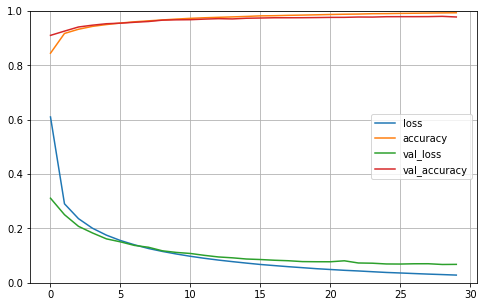

--- Evaluation:
313/313 [==============================] - 0s 1ms/step - loss: 0.0732 - accuracy: 0.9774


[0.07324954867362976, 0.977400004863739]

In [10]:
doExperiment(mlp_model, mnist, verbose=True, rand_permute=True, plot_hist=True)

### fashion_mnist dataset

--- Splitting Data ...
Creating random permutation
(54000, 28, 28, 1) train samples
(10000, 28, 28, 1) test samples
(6000, 28, 28, 1) validation samples
(54000, 10) train labels
(10000, 10) test labels
(6000, 10) validation labels
--- Training Model ...
Epoch 1/30
1688/1688 [==============================] - 3s 2ms/step - loss: 0.8225 - accuracy: 0.7476 - val_loss: 0.4472 - val_accuracy: 0.8483
Epoch 2/30
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4332 - accuracy: 0.8443 - val_loss: 0.4264 - val_accuracy: 0.8472
Epoch 3/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3788 - accuracy: 0.8664 - val_loss: 0.4101 - val_accuracy: 0.8542
Epoch 4/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3549 - accuracy: 0.8743 - val_loss: 0.3647 - val_accuracy: 0.8700
Epoch 5/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3382 - accuracy: 0.8797 - val_loss: 0.3691 - val_accuracy: 0.8632
Epoch 6/30
1688/1688 [====

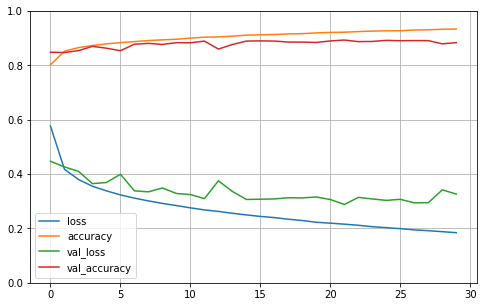

--- Evaluation:
313/313 [==============================] - 0s 1ms/step - loss: 0.3600 - accuracy: 0.8756


[0.36003437638282776, 0.8755999803543091]

In [11]:
doExperiment(mlp_model, fashion_mnist, verbose=True, rand_permute=True, plot_hist=True)

### MLP settings experiments

In [13]:
mlp_scores = {}
for l1 in range(0,801, 100): 
  for l2 in range(0,801,100):
    for l3 in range(0,801, 100):
      mlp_model = keras.models.Sequential([keras.layers.Flatten(input_shape=[28, 28, 1])])
      if not l1 == 0: 
        mlp_model.add(keras.layers.Dense(l1, activation="relu"))
      if not l2 == 0: 
        mlp_model.add(keras.layers.Dense(l2, activation="relu"))
      if not l3 == 0: 
        mlp_model.add(keras.layers.Dense(l3, activation="relu"))
      mlp_model.add(keras.layers.Dense(10, activation="softmax"))
      #print(mlp_model.summary())
      score = doExperiment(mlp_model, fashion_mnist, verbose=False, plot_hist=False)
      mlp_scores[l1,l2,l3] = score
      #print(f'layer one {l1} layer two {l2} layer three {l3}  with a score of loss {score[0]} and accuracy {score[1]}')

--- Splitting Data ...
--- Training Model ...
313/313 [==============================] - 0s 827us/step - loss: 0.4582 - accuracy: 0.8380
--- Splitting Data ...
--- Training Model ...
313/313 [==============================] - 0s 1ms/step - loss: 0.3739 - accuracy: 0.8658
--- Splitting Data ...
--- Training Model ...
313/313 [==============================] - 0s 901us/step - loss: 0.3553 - accuracy: 0.8740
--- Splitting Data ...
--- Training Model ...
313/313 [==============================] - 0s 1ms/step - loss: 0.3508 - accuracy: 0.8772
--- Splitting Data ...
--- Training Model ...
313/313 [==============================] - 0s 1ms/step - loss: 0.3523 - accuracy: 0.8756
--- Splitting Data ...
--- Training Model ...
313/313 [==============================] - 0s 1ms/step - loss: 0.3466 - accuracy: 0.8743
--- Splitting Data ...
--- Training Model ...
313/313 [==============================] - 0s 1ms/step - loss: 0.3472 - accuracy: 0.8745
--- Splitting Data ...
--- Training Model ...
313/3

KeyboardInterrupt: 

In [14]:
# average Performance
avg = 0
c=0
for k,v in mlp_scores.items():
  if not k[0] == 0 and not k[1] == 0 and k[2] == 0:
    c+=1
    avg += v[1]
print(avg/c)

0.8788380949270158


In [15]:
len(mlp_scores)

512

In [16]:
#HeatMap Creation
mlp_scores2d = pd.DataFrame(columns = ['Layer One', 'Layer Two', 'Accuracy'])
for k,v in mlp_scores.items():
  if k[2]== 0 :
    mlp_scores2d = mlp_scores2d.append({'Layer One': k[0], 'Layer Two':k[1], 'Accuracy':v[1]}, ignore_index = True)

## CNN Experiments

In [ ]:
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, activation='relu', padding="SAME")

cnn_model = keras.models.Sequential([
DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
keras.layers.MaxPooling2D(pool_size=2),
DefaultConv2D(filters=128),
DefaultConv2D(filters=128),
keras.layers.MaxPooling2D(pool_size=2),
DefaultConv2D(filters=256),
DefaultConv2D(filters=256),
keras.layers.MaxPooling2D(pool_size=2),
keras.layers.Flatten(),
keras.layers.Dense(units=128, activation='relu'),
keras.layers.Dropout(0.5),
keras.layers.Dense(units=64, activation='relu'),
keras.layers.Dropout(0.5),
keras.layers.Dense(units=10, activation='softmax'),
])


### mnist

In [ ]:
doExperiment(cnn_model, mnist, verbose=True)

### fmnist

In [ ]:
doExperiment(cnn_model, fmnist, verbose=True)

### CNN settings

In [ ]:
cnn_scores = {}

for kernal_size in [0,1,2,3]:
  for max_pooling_size in [0,1,2,3]:
    DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3+ kernal_size, activation='relu', padding="SAME")
    if not max_pooling_size == 0:
      cnn_model = keras.models.Sequential([
          DefaultConv2D(filters=64, kernel_size=7+kernal_size, input_shape=[28, 28, 1]),
          
          keras.layers.MaxPooling2D(pool_size=max_pooling_size),
          DefaultConv2D(filters=128),
          DefaultConv2D(filters=128),
          keras.layers.MaxPooling2D(pool_size=max_pooling_size),
          DefaultConv2D(filters=256),
          DefaultConv2D(filters=256),
          keras.layers.MaxPooling2D(pool_size=max_pooling_size),
          keras.layers.Flatten(),
          keras.layers.Dense(units=128, activation='relu'),
          keras.layers.Dropout(0.5),
          keras.layers.Dense(units=64, activation='relu'),
          keras.layers.Dropout(0.5),
          keras.layers.Dense(units=10, activation='softmax'),
          ])
    else:
      cnn_model = keras.models.Sequential([
          DefaultConv2D(filters=64, kernel_size=7+kernal_size, input_shape=[28, 28, 1]),
          DefaultConv2D(filters=128),
          DefaultConv2D(filters=128),
          DefaultConv2D(filters=256),
          DefaultConv2D(filters=256),
          keras.layers.Flatten(),
          keras.layers.Dense(units=128, activation='relu'),
          keras.layers.Dropout(0.5),
          keras.layers.Dense(units=64, activation='relu'),
          keras.layers.Dropout(0.5),
          keras.layers.Dense(units=10, activation='softmax'),
          ])
    score = doExperiment(cnn_model, fashion_mnist, verbose=False)
    cnn_scores[max_pooling_size,kernal_size] = score

In [ ]:
cnn_scores2d = pd.DataFrame(columns = ['Max Pooling Size', 'Kernel Size', 'Accuracy'])
for k,v in cnn_scores.items():
    cnn_scores2d = cnn_scores2d.append({'Max Pooling Size': k[0], 'Kernel Size':k[1], 'Accuracy':v[1]}, ignore_index = True)

In [ ]:
heatmapdf = cnn_scores2d.set_index(['Max Pooling Size','Kernel Size'])
heatmapdf = heatmapdf.unstack(level=0)
ax = sns.heatmap(heatmapdf, annot=True)